# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='bitcoin', language='en')
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news["articles"])
bitcoin_news["articles"]

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'David Murphy',
  'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
  'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
  'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
  'publishedAt': '2021-03-31T14:00:00Z',
  'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]'},
 {'source': {'id': 'engadget', 'nam

In [5]:
# Sentiment scores dictionaries
content_sent = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": [],
}

# Get sentiment for the content
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["Compound"].append(content_sentiment["compound"])
        content_sent["Negative"].append(content_sentiment["neg"])
        content_sent["Neutral"].append(content_sentiment["neu"])
        content_sent["Positive"].append(content_sentiment["pos"])
        
    except AttributeError:
        pass
    
# Create the bitcoin sentiment scores DataFrame   
bitcoin_sentiment_df = pd.DataFrame(content_sent)
bitcoin_sentiment_df['Text'] = bitcoin_df['content']
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...


In [6]:
# Fetch the Ethereum news articles
etherum_news = newsapi.get_everything(q='etherum', language='en')
etherum_df = pd.DataFrame.from_dict(etherum_news["articles"])

In [7]:
e_content_sent = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": [],
}

# Get sentiment for the content
for index, row in etherum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        content_sentiment = analyzer.polarity_scores(row["content"])
        e_content_sent["Compound"].append(content_sentiment["compound"])
        e_content_sent["Negative"].append(content_sentiment["neg"])
        e_content_sent["Neutral"].append(content_sentiment["neu"])
        e_content_sent["Positive"].append(content_sentiment["pos"])
        
    except AttributeError:
        pass
    
# Create the etherum sentiment scores DataFrame   
etherum_sentiment_df = pd.DataFrame(e_content_sent)
etherum_sentiment_df['Text'] = etherum_df['content']
etherum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
1,0.2732,0.000,0.938,0.062,"ConsenSys, a key player in crypto and a major ..."
2,-0.3182,0.092,0.847,0.061,(Reuters) - If Elon Musks Tesla wanted to insu...
3,0.4767,0.000,0.893,0.107,NEW YORK(Thomson Reuters Regulatory Intelligen...
4,0.3612,0.000,0.937,0.063,If you’ve tried to buy the latest generation o...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.236610,0.028250,0.891400,0.080350
std,0.373060,0.047327,0.079059,0.066469
min,-0.557400,0.000000,0.709000,0.000000
25%,0.038700,0.000000,0.863250,0.047250
50%,0.318200,0.000000,0.911000,0.066500
75%,0.432825,0.054500,0.936250,0.103750
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
etherum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,15.000000,15.000000,15.000000,15.000000
mean,0.222187,0.017933,0.914067,0.068067
std,0.230581,0.031797,0.059611,0.041221
min,-0.318200,0.000000,0.794000,0.000000
25%,0.078300,0.000000,0.880500,0.050500
50%,0.273200,0.000000,0.937000,0.062000
75%,0.371500,0.026500,0.949000,0.096000
max,0.570900,0.092000,1.000000,0.141000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
# NLTK list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = [regex.sub('', text)]
    tokens = [word_tokenize(i) for i in re_clean]
    first_result = [word.lower() for words in tokens for word in words if word.lower() not in sw]
    lem = [lemmatizer.lemmatize(word) for word in first_result]
    return lem


In [14]:
articles = bitcoin_sentiment_df['Text']
bitcoin_sentiment_df['Tokens'] = [tokenizer(article) for article in articles]
bitcoin_sentiment_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.6124,0.000,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
3,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
4,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."
5,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...,"[national, burrito, day, land, april, fool, da..."
6,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
7,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
8,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...,"[seems, like, everyone, making, money, nfts, n..."
9,0.7717,0.051,0.709,0.240,Data centers and bitcoin mining operations are...,"[data, center, bitcoin, mining, operation, bec..."


In [15]:
# Create a new tokens column for ethereum
articles = etherum_sentiment_df['Text']
etherum_sentiment_df['Tokens'] = [tokenizer(article) for article in articles]
etherum_sentiment_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, ri..."
1,0.2732,0.000,0.938,0.062,"ConsenSys, a key player in crypto and a major ...","[consensys, key, player, crypto, major, propon..."
2,-0.3182,0.092,0.847,0.061,(Reuters) - If Elon Musks Tesla wanted to insu...,"[reuters, elon, musk, tesla, wanted, insure, r..."
3,0.4767,0.000,0.893,0.107,NEW YORK(Thomson Reuters Regulatory Intelligen...,"[new, yorkthomson, reuters, regulatory, intell..."
4,0.3612,0.000,0.937,0.063,If you’ve tried to buy the latest generation o...,"[youve, tried, buy, latest, generation, amd, n..."
5,0.2732,0.000,0.938,0.062,"ConsenSys, a key player in crypto and a major ...","[consensys, key, player, crypto, major, propon..."
6,0.1280,0.000,0.959,0.041,"Ethereum is likely to outperform Bitcoin, at l...","[ethereum, likely, outperform, bitcoin, least,..."
7,0.5709,0.000,0.869,0.131,Despite Dogecoin under-performing this past we...,"[despite, dogecoin, underperforming, past, wee..."
8,0.3818,0.065,0.794,0.141,BackyardProduction / iStock.com\r\nCryptocurre...,"[backyardproduction, istockcomcryptocurrencies..."
9,0.3612,0.000,0.915,0.085,"Like JAY-Z, Jim Jones is an entrepreneur curre...","[like, jayz, jim, jones, entrepreneur, current..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
for Token in bitcoin_sentiment_df['Tokens']:
    bigrams = ngrams(Token, n=2)
    bitcoin_bigrams = list(Counter(bigrams).most_common())

bitcoin_bigrams

[(('reuters', 'stafflondon'), 1),
 (('stafflondon', 'april'), 1),
 (('april', 'reuters'), 1),
 (('reuters', 'bitcoin'), 1),
 (('bitcoin', 'hit'), 1),
 (('hit', 'record'), 1),
 (('record', 'tuesday'), 1),
 (('tuesday', 'extending'), 1),
 (('extending', 'rally'), 1),
 (('rally', 'new'), 1),
 (('new', 'heightsthe'), 1),
 (('heightsthe', 'world'), 1),
 (('world', 'biggest'), 1),
 (('biggest', 'cryptocurrency'), 1),
 (('cryptocurrency', 'doubled'), 1),
 (('doubled', 'price'), 1),
 (('price', 'char'), 1)]

In [18]:
# Generate the Ethereum N-grams where N=2

for Token in etherum_sentiment_df['Tokens']:
    bigrams = ngrams(Token, n=2)
    etherum_bigrams = list(Counter(bigrams).most_common())

etherum_bigrams

[(('new', 'delhimumbai'), 1),
 (('delhimumbai', 'reuters'), 1),
 (('reuters', 'india'), 1),
 (('india', 'propose'), 1),
 (('propose', 'law'), 1),
 (('law', 'banning'), 1),
 (('banning', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'fining'), 1),
 (('fining', 'anyone'), 1),
 (('anyone', 'trading'), 1),
 (('trading', 'country'), 1),
 (('country', 'even'), 1),
 (('even', 'holding'), 1),
 (('holding', 'digital'), 1),
 (('digital', 'asset'), 1),
 (('asset', 'senior'), 1),
 (('senior', 'government'), 1),
 (('government', 'official'), 1),
 (('official', 'told'), 1),
 (('told', 'reuters'), 1),
 (('reuters', 'char'), 1)]

In [19]:
# Get the top 10 words for Bitcoin
for Token in bitcoin_sentiment_df['Tokens']:
    bit_top10 = list(Counter(Token).most_common())
    
bit_top10

[('reuters', 2),
 ('stafflondon', 1),
 ('april', 1),
 ('bitcoin', 1),
 ('hit', 1),
 ('record', 1),
 ('tuesday', 1),
 ('extending', 1),
 ('rally', 1),
 ('new', 1),
 ('heightsthe', 1),
 ('world', 1),
 ('biggest', 1),
 ('cryptocurrency', 1),
 ('doubled', 1),
 ('price', 1),
 ('char', 1)]

In [20]:
# Get the top 10 words for Ethereum
for Token in etherum_sentiment_df['Tokens']:
    eth_top10 = list(Counter(Token).most_common())
    
eth_top10

[('reuters', 2),
 ('new', 1),
 ('delhimumbai', 1),
 ('india', 1),
 ('propose', 1),
 ('law', 1),
 ('banning', 1),
 ('cryptocurrencies', 1),
 ('fining', 1),
 ('anyone', 1),
 ('trading', 1),
 ('country', 1),
 ('even', 1),
 ('holding', 1),
 ('digital', 1),
 ('asset', 1),
 ('senior', 1),
 ('government', 1),
 ('official', 1),
 ('told', 1),
 ('char', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
bitcoin_corpus=[]
counter=0
for Text in bitcoin_sentiment_df['Tokens']:
    bitcoin_corpus.append(bitcoin_sentiment_df['Tokens'][counter])
    counter+=1
print(bitcoin_corpus)

[['whether', 'youre', 'looking', 'make', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab', 'char'], ['promised', 'earlier', 'year', 'tesla', 'accepts', 'payment', 'bitcoin', 'according', 'tesla', 'website', 'tweet', 'ceo', 'elon', 'musk', 'subsequent', 'tweet', 'musk', 'said', 'bitcoin', 'paid', 'tesla', 'char'], ['crypto', 'industry', 'whole', 'seen', 'momentous', 'year', 'growth', 'heavily', 'spurred', 'entrance', 'institutional', 'investor', 'adopting', 'bitcoin', 'due', 'store', 'value', 'property', 'spike', 'char'], ['inevitable', 'happened', 'purchase', 'tesla', 'vehicle', 'bitcointhis', 'according', 'tesla', 'ceo', 'pardon', 'technoking', 'elon', 'musk', 'tweeted', 'wednesdayyou', 'buy', 'tesla', 'char'], ['tesla', 'made', 'headline', 'earlier', 'year', 'took', 'significant', 'holding', 'bitcoin', 'acquiring', 'roughly', 'billion', 'stake', 'thenprices', 'early', 'febru

(-0.5, 399.5, 199.5, -0.5)

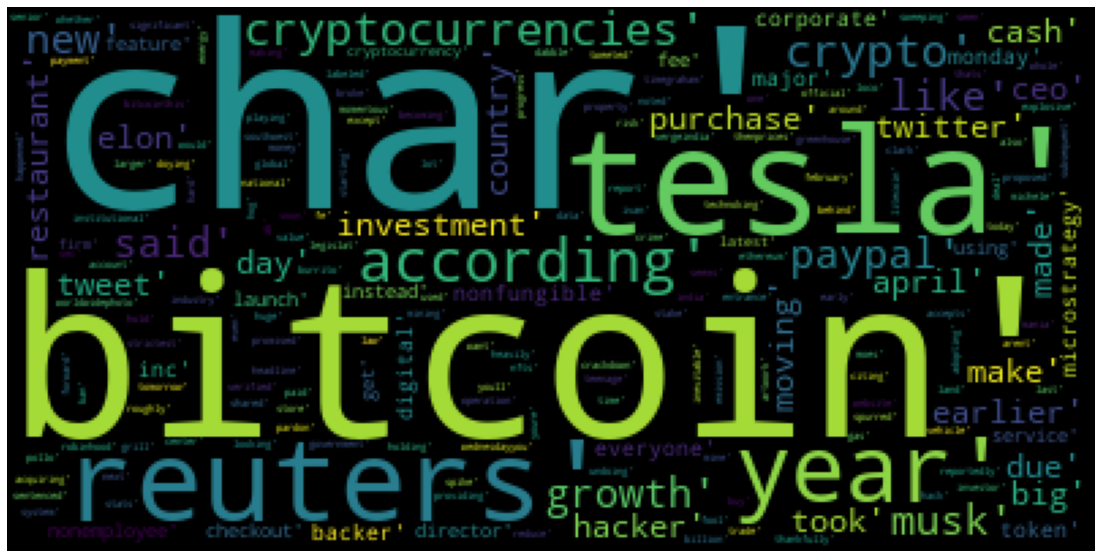

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(str(bitcoin_corpus))
plt.imshow(img)
plt.axis("off")

In [24]:
etherum_corpus=[]
counter=0
for Text in etherum_sentiment_df['Tokens']:
    etherum_corpus.append(etherum_sentiment_df['Tokens'][counter])
    counter+=1
print(etherum_corpus)

[['reuters', 'stafffile', 'photo', 'representation', 'ripple', 'bitcoin', 'etherum', 'litecoin', 'virtual', 'currency', 'seen', 'pc', 'motherboard', 'illustration', 'picture', 'february', 'reutersdad', 'char'], ['consensys', 'key', 'player', 'crypto', 'major', 'proponent', 'ethereum', 'blockchain', 'raised', 'million', 'funding', 'round', 'fromjp', 'morgan', 'mastercard', 'ubs', 'ag', 'well', 'major', 'blockchain', 'compan', 'char'], ['reuters', 'elon', 'musk', 'tesla', 'wanted', 'insure', 'recent', 'billion', 'bitcoin', 'investment', 'myriad', 'pitfall', 'could', 'encounter', 'like', 'hack', 'theft', 'fraud', 'would', 'l', 'char'], ['new', 'yorkthomson', 'reuters', 'regulatory', 'intelligence', 'read', 'thomson', 'reuters', 'regulatory', 'intelligence', 'team', 'click', 'bitlytrregintelrepresentations', 'ripple', 'bitcoin', 'etherum', 'char'], ['youve', 'tried', 'buy', 'latest', 'generation', 'amd', 'nvidia', 'graphic', 'card', 'amd', 'ryzen', 'processor', 'game', 'console', 'like', '

(-0.5, 399.5, 199.5, -0.5)

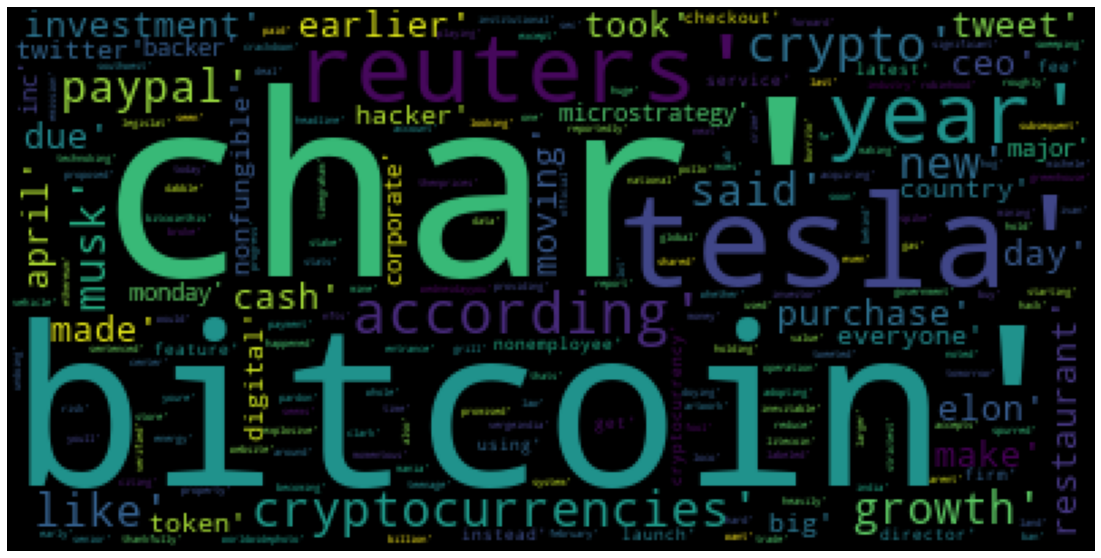

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud()
img = wc.generate(str(bitcoin_corpus))
plt.imshow(img)
plt.axis("off")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
bitcoin_corpus=[]
counter=0
for Text in bitcoin_sentiment_df['Text']:
    bitcoin_corpus.append(bitcoin_sentiment_df['Text'][counter])
    counter+=1
print(bitcoin_corpus)

['Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]', 'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]', 'The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]', 'The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars]', 'Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 b

In [30]:
# Concatenate all of the bitcoin text together
bitcoin_big_string = ' '.join([token for token in bitcoin_corpus])
bitcoin_big_string

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake 

In [31]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_big_string)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
bitcoin_entities = ([ent.text for ent in doc.ents])
bitcoin_entities

['Bitcoin, Ethereum',
 'Bitcoin Cash',
 'earlier this year',
 'Tesla',
 'Bitcoin',
 'Tesla',
 'Elon Musk',
 'Musk',
 'Tesla',
 'a momentous year',
 '2020',
 'Tesla',
 'Bitcoin',
 'Elon Musk',
 'Wednesday',
 'earlier this year',
 'roughly $1.5 billion',
 'early February',
 'SEC',
 'National Burrito Day',
 'April Fools Day',
 'this year',
 'tomorrow',
 'Pollo Loco',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'last years',
 'Twitter',
 'Graham Ivan Clark',
 'Twitters',
 'India',
 'Reuters',
 'a big year',
 'Robinhood',
 'today',
 'Christine Brown',
 'Robinhoods',
 'Reuters',
 'Reuters',
 'Inc',
 'Monday',
 'this morning',
 'millions',
 'Reuters',
 'April 12',
 'Reuters',
 'Monday',
 'Funko',
 'NFT',
 'TokenWave',
 '23, 2021',
 'Spanish',
 'AI',
 'Bitcoin',
 'The Wise Origin Bitcoin ETF',
 'the United States',
 'FD Funds Management LLC',
 'PayPal',
 'Julian Satterthwaite',
 'Reuters',
 'LONDON',
 'April 13',
 'Reuters',
 '62,575',
 'Tuesday',
 '2021']

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
etherum_corpus=[]
counter=0
for Text in etherum_sentiment_df['Text']:
    etherum_corpus.append(etherum_sentiment_df['Text'][counter])
    counter+=1
print(etherum_corpus)

['By Reuters Staff\r\nFILE PHOTO: Representations of the Ripple, bitcoin, etherum and Litecoin virtual currencies are seen on a PC motherboard in this illustration picture, February 14, 2018. REUTERS/Dad… [+439 chars]', 'ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0J.P. Morgan, Mastercard, and UBS AG, as well as major blockchain compan… [+8767 chars]', '(Reuters) - If Elon Musks Tesla wanted to insure all of its recent $1.5 billion bitcoin investment against the myriad of pitfalls it could encounter, like hacks, theft and fraud, it would be out of l… [+5114 chars]', 'NEW YORK(Thomson Reuters Regulatory Intelligence) - *To read more by the Thomson Reuters Regulatory Intelligence team click here: bit.ly/TR-RegIntel\r\nRepresentations of the Ripple, bitcoin, etherum a… [+11798 chars]', 'If you’ve tried to buy the latest generation of AMD or Nvidia graphics cards, AMD Ryzen processors, or game consoles

In [35]:
etherum_big_string = ' '.join([token for token in etherum_corpus])
etherum_big_string

'By Reuters Staff\r\nFILE PHOTO: Representations of the Ripple, bitcoin, etherum and Litecoin virtual currencies are seen on a PC motherboard in this illustration picture, February 14, 2018. REUTERS/Dad… [+439 chars] ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0J.P. Morgan, Mastercard, and UBS AG, as well as major blockchain compan… [+8767 chars] (Reuters) - If Elon Musks Tesla wanted to insure all of its recent $1.5 billion bitcoin investment against the myriad of pitfalls it could encounter, like hacks, theft and fraud, it would be out of l… [+5114 chars] NEW YORK(Thomson Reuters Regulatory Intelligence) - *To read more by the Thomson Reuters Regulatory Intelligence team click here: bit.ly/TR-RegIntel\r\nRepresentations of the Ripple, bitcoin, etherum a… [+11798 chars] If you’ve tried to buy the latest generation of AMD or Nvidia graphics cards, AMD Ryzen processors, or game consoles like the PS5

In [36]:
# Run the NER processor on all of the text
doc = nlp(etherum_big_string)

# Add a title to the document
doc.user_data["title"] = "Etherum NER"

In [37]:
# Render the visualization
displacy.render(doc, style='ent')

In [38]:
# List all Entities
bitcoin_entities = ([ent.text for ent in doc.ents])
bitcoin_entities

['Reuters',
 'Litecoin',
 'February 14, 2018',
 'REUTERS/Dad',
 'ConsenSys',
 'Ethereum',
 '$65 million',
 'J.P. Morgan',
 'Mastercard',
 'UBS AG',
 'Reuters',
 '$1.5 billion',
 'the Thomson Reuters Regulatory Intelligence',
 'AMD',
 'Nvidia',
 'AMD Ryzen',
 'ConsenSys',
 'Ethereum',
 '$65 million',
 'J.P. Morgan',
 'Mastercard',
 'UBS AG',
 'Scott Melker',
 'Cointelegraph',
 'Melker',
 'this past week',
 'Reddit',
 'Skew',
 'Cryptocurrencies',
 'Jim Jones',
 'Capo-Saucy Extract Farms',
 'Vampire',
 'the past month',
 'DeFi',
 'the past few months',
 'Non-Fungible Tokens',
 'Bullish Report',
 'Bloomberg',
 '400,000',
 '2021Bitcoin',
 'Dylan LeClair',
 '04/12/2021',
 'AM PDT',
 'Leonardo da Vincis Renaissance',
 'the Mona Lisa',
 'the century',
 'Reuters',
 'India',
 'Reuters']